In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import sympy as sy
from scipy.interpolate import lagrange

F = lambda t,y : 4*t*y**(0.5)


In [2]:
#revised integral deferred correction


def RIDC(a,b,N,p,K,y0,F):#Euler
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1) #stores the solution
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        Y[:, 0] = sol_list[j*K]  # predictor starts w last point in j-1 interval
        for m in range(K):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Eulers forward method  
            
        for l in range(1,M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y1[j,m])-F(T[j,m],Y[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                
                g = sum([S[M-1,k]*F(T[j,m-M+k+1],Y[j,m-M+k+1]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y1[j,m])-F(T[j,m],Y[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]

            
    return sol_list




Finished in 0.8 second(s)


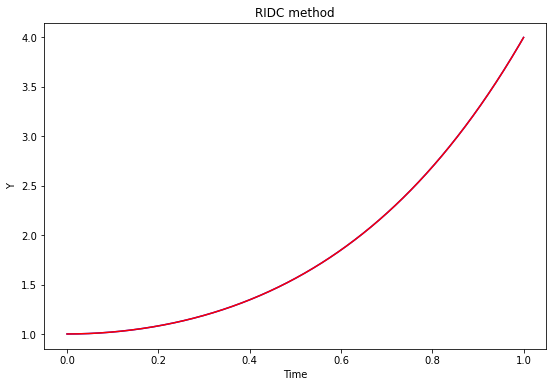

In [3]:

#K = RIDC(0,1,90,6,5,1,F)
#RIDC(a,b,N,p(M=p-1),K,y0)

T = 10.0
y0 = 1.0
p = 4  # RIDC(6,40)
M = p-1
K = 200
N = 1000

T = np.linspace(0,1,1001)
import time
start = time.perf_counter()
K = RIDC(0,1,1000,11,200,1,F)
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T, K, 'b-', markersize=2)
plt.plot(T, (1+T**2)**2, 'r-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('RIDC method')
plt.show()

In [4]:
def func_sol(T):  #exact solution
    
    y_t = (1+T**2)**2
    
    return np.array([y_t])

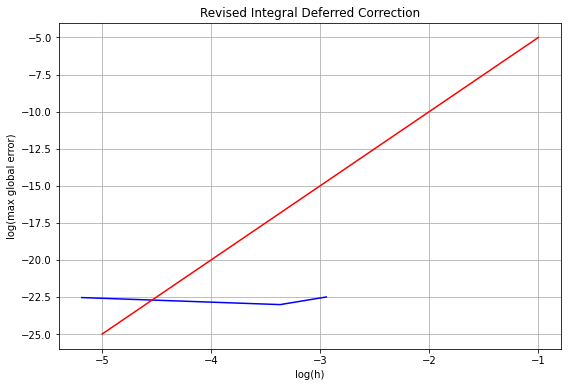

In [5]:
errorlist2 = []
stepsizelist2 = []

for i in [20,30,180]:   
    T = np.linspace(0, 1, i+1)
    K2 = RIDC(0,1,i,11,10,1,F)
    stepsizelist2.append(1/(i-1))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-25,-5], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Revised Integral Deferred Correction')
plt.show()

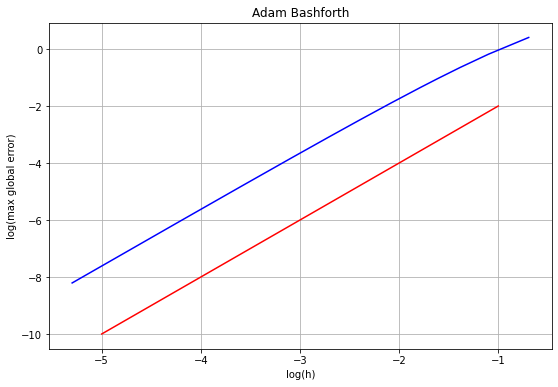

In [6]:
def Adam_b(T,f,y0):  #adam bashforth 2
    
    no_of_times = T.size                                                     
    Y = np.zeros(no_of_times)
    Y[0] = y0
    h = T[1] - T[0]
    for i in range(2):
        Y[i+1] = Y[i] + h*f(T[i],Y[i])
    for i in range(no_of_times-2):
        Y[i+2] = Y[i+1] + h*(3/2*f(T[i+1],Y[i+1]) - 1/2*f(T[i],Y[i]))
        
    return Y


errorlist2 = []
stepsizelist2 = []

for i in range(3,202):   
    T = np.linspace(0, 1, i)
    K3 = Adam_b(T,F,1)
    stepsizelist2.append(1/(i-1))
    m = [abs(K3[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-10,-2], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Adam Bashforth')
plt.show()

In [7]:
#revised integral deferred correction with Adam bashford prediction


def RIDC_adam1(a,b,N,p,K,y0,F):#Adam Bashforth
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(2):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Adam Bashforth 2    
        for m in range(K-2):
            Y[j,m+2] = Y[j,m+1] + h*(3/2*F(T[j,m+1],Y[j,m+1]) - 1/2*F(T[j,m],Y[j,m]))
            
        
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                
                g = sum([S[M-1,k]*F(T[j,m-M+k+1],Y[j,m-M+k+1]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,K]
            
    return sol_list



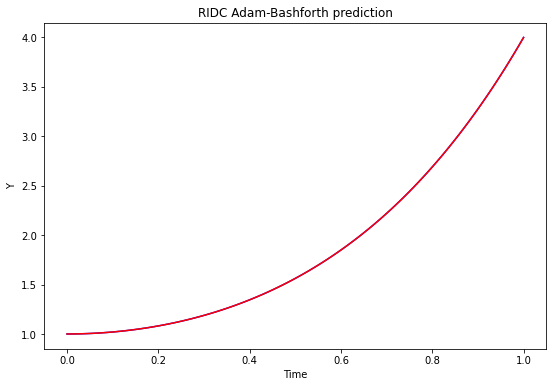

array([1.        , 1.00020001, 1.00080016, 1.00180081, 1.00320256,
       1.00500625, 1.00721296, 1.00982401, 1.01284096, 1.01626561,
       1.0201    , 1.02434641, 1.02900736, 1.03408561, 1.03958416,
       1.04550625, 1.05185536, 1.05863521, 1.06584976, 1.07350321,
       1.0816    , 1.09014481, 1.09914256, 1.10859841, 1.11851776,
       1.12890625, 1.13976976, 1.15111441, 1.16294656, 1.17527281,
       1.1881    , 1.20143521, 1.21528576, 1.22965921, 1.24456336,
       1.26000625, 1.27599616, 1.29254161, 1.30965136, 1.32733441,
       1.3456    , 1.36445761, 1.38391696, 1.40398801, 1.42468096,
       1.44600625, 1.46797456, 1.49059681, 1.51388416, 1.53784801,
       1.5625    , 1.58785201, 1.61391616, 1.64070481, 1.66823056,
       1.69650625, 1.72554496, 1.75536001, 1.78596496, 1.81737361,
       1.8496    , 1.88265841, 1.91656336, 1.95132961, 1.98697216,
       2.02350625, 2.06094736, 2.09931121, 2.13861376, 2.17887121,
       2.2201    , 2.26231681, 2.30553856, 2.34978241, 2.39506

In [8]:
T1 = np.linspace(0,1,101)
K3 = RIDC_adam1(0,1,100,11,10,1,F)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T1, K3, 'b-', markersize=2)
plt.plot(T1, (1+T1**2)**2, 'r-', markersize=2)
#plt.plot(T1, K3, 'y-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('RIDC Adam-Bashforth prediction')
plt.show()

K3

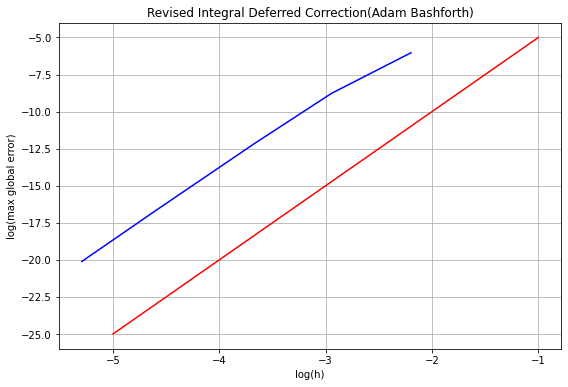

In [9]:
errorlist2 = []
stepsizelist2 = []

for i in [10,20,40,100,200]:   
    T = np.linspace(0, 2, i+1)
    K4 = RIDC_adam1(0,2,i,6,5,1,F)
    stepsizelist2.append(1/(i-1))
    m = [abs(K4[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-25,-5], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Revised Integral Deferred Correction(Adam Bashforth)')
plt.show()

In [10]:
def AB4_pred(T,Y):
    v1 = F(T[0],Y[0])
    v2 = F(T[1],Y[1])
    v3 = F(T[2],Y[2])
    v4 = F(T[3],Y[3])
    x = Y[0]+(55*v1-59*v2+37*v3 -9*v4)*h/24
       
    return x

def Ab4_corr(T,Y,Y1):
    v1 = F(T[0],Y1[0])-F(T[0],Y[0])
    v2 = F(T[1],Y1[1])-F(T[1],Y[1])
    v3 = F(T[2],Y1[2])-F(T[2],Y[2])
    v4 = F(T[3],Y1[3])-F(T[3],Y[3])
    x = Y1[0]+(55*v1-59*v2+37*v3 -9*v4)*h/24
    
    return x
    

In [11]:
#revised integral deferred correction
#WORK ON THIS

def RIDC_ab4(a,b,N,p,K,y0,F):#Euler
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function
    
    def AB4_pred(T,Y):
        v1 = F(T[0],Y[0])
        v2 = F(T[1],Y[1])
        v3 = F(T[2],Y[2])
        v4 = F(T[3],Y[3])
        x = Y[3]+(55*v4-59*v3+37*v2-9*v1)*h/24
        return x
    
    def AB4_corr(T,Y,Y1):
        v1 = F(T[0],Y1[0])-F(T[0],Y[0])
        v2 = F(T[1],Y1[1])-F(T[1],Y[1])
        v3 = F(T[2],Y1[2])-F(T[2],Y[2])
        v4 = F(T[3],Y1[3])-F(T[3],Y[3])
        x = Y1[3]+(55*v4-59*v3+37*v2 -9*v1)*h/24 
        return x
    
    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1) #stores the solution
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        Y[:, 0] = sol_list[j*K]  # predictor starts w last point in j-1 interval
        for m in range(3):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Eulers forward method  
        for m in range(3,K):
            Y[j,m+1] = AB4_pred(T[j,m-3:m+1],Y[j,m-3:m+1]) #AB4 method
            
        for l in range(1,M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(3):  
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y1[j,m])-F(T[j,m],Y[j,m])) + h*g #solve error equation with forward Euler
            for m in range(3,M):
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])
                Y1[j,m+1] = AB4_corr(T[j,m-3:m+1],Y[j,m-3:m+1],Y1[j,m-3:m+1]) +h*g
            
            for m in range(M,K):                
                g = sum([S[M-1,k]*F(T[j,m-M+k+1],Y[j,m-M+k+1]) for k in range(M+1)])                
                Y1[j,m+1] = AB4_corr(T[j,m-3:m+1],Y[j,m-3:m+1],Y1[j,m-3:m+1]) + h*g
                
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]

            
    return sol_list

import time
start = time.perf_counter()
K5 = RIDC_ab4(0,1,1000,15,200,1,F)
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')
K5

Finished in 2.62 second(s)


array([1.        , 1.000002  , 1.000008  , ..., 3.984036  , 3.99201205,
       4.00000406])

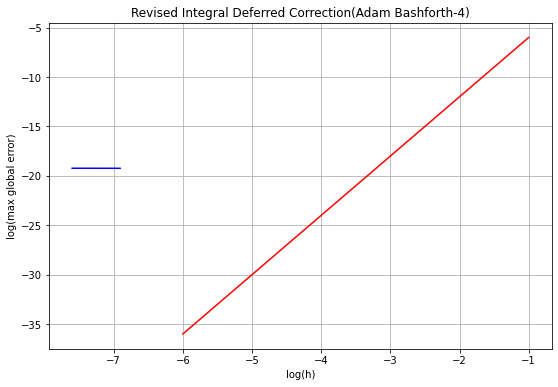

In [12]:
errorlist2 = []
stepsizelist2 = []

for i in [1000,2000]:   
    T = np.linspace(0, 2, i+1)
    K4 = RIDC_ab4(0,2,i,10,200,1,F)
    stepsizelist2.append(1/(i-1))
    m = [abs(K4[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-6,-1], [-36,-6], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Revised Integral Deferred Correction(Adam Bashforth-4)')
plt.show()

In [13]:
import time
from scipy.integrate import quadrature
from functools import reduce
M=10
S = np.zeros((M,M+1))  #integration matrix
start = time.perf_counter()
for m in range(M):
    for i in range(M+1):
        c = lambda t,i : reduce(lambda x, y: x*y, 
                            [(t-k)/(i-k) for k in range(M) if k!=i])
        S[m,i] = quadrature(c, m, m+1, args=(i))[0]
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.03 second(s)


In [14]:
start = time.perf_counter()
for m in range(M):   # calculating integration matrix
    for i in range(M+1):
        x = np.arange(M+1)  # Construct a polynomial
        y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
        y[i] = 1
        p = lagrange(x, y)  # constructs polynomial
        para = np.poly1d.integ(p)  
        S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.71 second(s)


[1.         1.00020001 1.00080016 1.00180081 1.00320256 1.00500625
 1.00721296 1.00982401 1.01284096 1.01626561 1.0201    ]


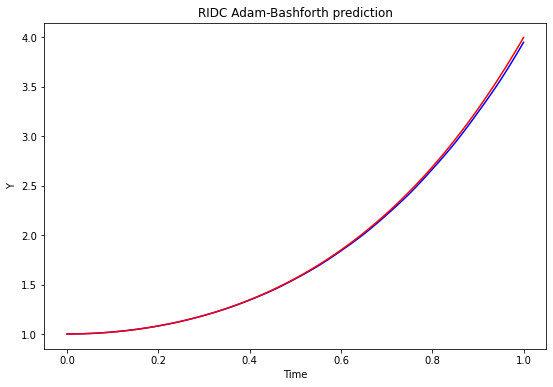

In [17]:
def RIDC_ab41(a,b,N,p,K,y0,F):#AB-4
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function
    
    def AB4_pred(T,Y):
        v1 = F(T[0],Y[0])
        v2 = F(T[1],Y[1])
        v3 = F(T[2],Y[2])
        v4 = F(T[3],Y[3])
        x = Y[3]+(55*v4-59*v3+37*v2-9*v1)*h/24
        return x
    
    def AB4_corr(T,Y,Y1):
        v1 = F(T[0],Y1[0])-F(T[0],Y[0])  #Y[m-2]
        v2 = F(T[1],Y1[1])-F(T[1],Y[1]) #Y[m-1]
        v3 = F(T[2],Y1[2])-F(T[2],Y[2]) #Y[m]
        v4 = F(T[3],Y1[3])-F(T[3],Y[3]) #Y[m+1]
        x = Y1[3]+(55*v4-59*v3+37*v2-9*v1)*h/24 
        return x
    
    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1) #stores the solution
    sol_list[0] = y0
    #T = np.zeros((J,K+1))
    #times = np.linspace(a,b,N+1)
    T = np.arange(0,b+h,h)
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
    
    for j in range(J):
        
        if j == 0:
            Y = np.zeros(K+1)
            Y[0] = y0
            for m in range(3):   #prediction
                Y[m+1] = Y[m]+h*F(T[m],Y[m])  #Euler forward
            for m in range(3,K):
                Y[m+1] = AB4_pred(T[m-3:m+1],Y[m-3:m+1])  # AB4 
               
            Y1 = np.zeros(K+1)    
                                               
            for l in range(1,M+1):   #correction
                Y1[0] = Y[0]
                
                for m in range(3):
                    g = sum([S[m,k]*F(T[k],Y[k]) for k in range(M+1)])
                    Y1[m+1] = Y1[m]+h*(F(T[m],Y1[m])-F(T[m],Y[m])) + h*g
                
                for m in range(3,M):
                    g = sum([S[m,k]*F(T[k],Y[k]) for k in range(M+1)])
                    Y1[m+1] = AB4_corr(T[m-3:m+1],Y[m-3:m+1],Y1[m-3:m+1]) +h*g
                
                for m in range(M,K):
                    g = sum([S[M-1,k]*F(T[m-M+k+1],Y[m-M+k+1]) for k in range(M+1)])
                    Y1[m+1] = AB4_corr(T[m-3:m+1],Y[m-3:m+1],Y1[m-3:m+1]) +h*g
                Y = Y1
            
                   
            sol_list[:K+1]=Y1
            print(Y1)        
        else:
            Y2 = np.zeros(4)
            Y2[:] = sol_list[j*K-3:j*K+1]  #AB4 stencil for prediction
            Y3 = np.zeros(K+1) 
            Y3[0] = sol_list[j*K]  # Y3 contains the previous correction level
            #print(Y3)
            for m in range(K):
                Y3[m+1] = AB4_pred(T[j*K+m-3:j*K+m+1],Y2)  #AB4 prediction
                Y2[:3] = Y2[1:]
                Y2[3] = Y3[m+1]   #updating AB4 stencil
                #print(Y2)   
        
            Y5  = np.zeros(K+1)
            Y5[0] = sol_list[j*K]  # Y5 contains the current correction level
            for l in range(1,M+1):
                Y4 = np.zeros(4)
                Y4[:] = sol_list[j*K-3:j*K+1]  #AB4 stencil for correction
                #print(Y4)
                #print(Y5)
                for m in range(M):
                    g = sum([S[m,k]*F(T[j*K+k],Y3[k]) for k in range(M+1)])
                    
                    Y5[m+1] = AB4_corr(T[j*K+m-3:j*K+m+1],Y3[m:m+4],Y4) + h*g ################
                    Y4[:3] = Y4[1:]  #updating AB4 stencil
                    Y4[3] = Y5[m+1]
                    #print(Y4)
                for m in range(M,K):
                    g = sum([S[M-1,k]*F(T[j*K+m-M+k+1],Y3[m-M+k+1]) for k in range(M+1)])
                    #print(Y3[m:m+4],Y4,T[j*K+m-3:j*K+m+1])
                    Y5[m+1] = AB4_corr(T[j*K+m-3:j*K+m+1],Y3[m-3:m+1],Y4) + h*g  ################
                    Y4[:3] = Y4[1:]  #updating AB4 stencil
                    Y4[3] = Y5[m+1]
                    #print(Y4)
                Y3 = Y5 #updating approximation
                    
            sol_list[j*K:j*K+K+1] = Y5
            
    return sol_list

K1 = RIDC_ab41(0,1,100,6,10,1,F)
#print(K1)
t = np.linspace(0,1,101)
#func_sol(t)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(t, K1, 'b-', markersize=2)
plt.plot(t, (1+t**2)**2, 'r-', markersize=2)
#plt.plot(T1, K3, 'y-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('RIDC Adam-Bashforth prediction')
plt.show()

In [18]:
K2 = RIDC_ab4(0,1,100,6,10,1,F)

K1 = RIDC_ab41(0,1,100,6,10,1,F)
K1,K2

[1.         1.00020001 1.00080016 1.00180081 1.00320256 1.00500625
 1.00721296 1.00982401 1.01284096 1.01626561 1.0201    ]


(array([1.        , 1.00020001, 1.00080016, 1.00180081, 1.00320256,
        1.00500625, 1.00721296, 1.00982401, 1.01284096, 1.01626561,
        1.0201    , 1.02431639, 1.0289416 , 1.03397802, 1.0394277 ,
        1.04529369, 1.05164213, 1.05842132, 1.06563513, 1.07328781,
        1.08138379, 1.08982092, 1.09869975, 1.1080258 , 1.11780174,
        1.12803424, 1.13889344, 1.15023384, 1.16206142, 1.174383  ,
        1.18720535, 1.20030549, 1.21390301, 1.22800777, 1.24262096,
        1.25775432, 1.27372966, 1.29026074, 1.30735528, 1.32502291,
        1.34327264, 1.36171459, 1.38073213, 1.40034086, 1.42053808,
        1.44134234, 1.46327469, 1.4858614 , 1.50911157, 1.53303783,
        1.55765139, 1.58234946, 1.6077237 , 1.63379703, 1.66056028,
        1.68804067, 1.71700609, 1.74674853, 1.77727813, 1.80861075,
        1.8407597 , 1.87286322, 1.9057659 , 1.93949945, 1.97404594,
        2.00944287, 2.04675265, 2.08498618, 2.12415426, 2.16427619,
        2.20536732, 2.24626064, 2.28809864, 2.33

In [19]:
Y4  = np.arange(4)
print(Y4)

Y4[:3] = Y4[1:]  #updating AB4 stencil
Y4[3] = 4
Y4

[0 1 2 3]


array([1, 2, 3, 4])